<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# KNN and Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

## Setup

We are going to use a dataset from the University of Wisconsin which contains features of the cell nuclei present in biopsies of breast masses.  The target to predict is whether the mass is malignant or benign.  Description of the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [2]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Let's scale the inputs to help it converge more easily
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

# Let's create a model using just two features so we can visualize it
X_train_2feats = X_train_scaled[['worst concave points','worst area']]
X_test_2feats = X_test_scaled[['worst concave points','worst area']]

In [4]:
def plot_decision_boundaries(X,y,model):
    """
    Plots the 2D decision boundary of a classification model
    Parameters:
    X (pandas dataframe): input features
    y (pandas series): target values
    model: trained scikit-learn model object
    """
    markers = ['^','s','v','o','x']
    colors = ['yellow','green','purple','blue','orange']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for i,k in enumerate(np.unique(y)):
        plt.scatter(X.loc[y.values==k].iloc[:,0],X.loc[y.values==k].iloc[:,1],
                    c=colors[i],marker=markers[i],label=k,edgecolor='black')

    xgrid = np.arange(X.iloc[:,0].min(),X.iloc[:,0].max(),
                      (X.iloc[:,0].max()-X.iloc[:,0].min())/500)
    ygrid = np.arange(X.iloc[:,1].min(),X.iloc[:,1].max(),
                      (X.iloc[:,1].max()-X.iloc[:,1].min())/500)
    xx,yy = np.meshgrid(xgrid,ygrid)
    
    mesh_preds = model.predict(np.c_[xx.ravel(),yy.ravel()])
    mesh_preds = mesh_preds.reshape(xx.shape)
    plt.contourf(xx,yy,mesh_preds,alpha=0.2,cmap=cmap)
    plt.legend()
    return

## PART 2: Support Vector Classifiers
### 2.1
We will now try a SVC on our two-feature simplified dataset.  In the cells below, create two different SVC models:  
- SVC with a linear kernel. 

For each model, keep the value of C fixed at 1.  Use k-folds cross-validation with k=10 to compare the performance of the two models.  Then, display the decision boundary and calculate the accuracy on the test set.

Kernel linear, acc: 0.9518


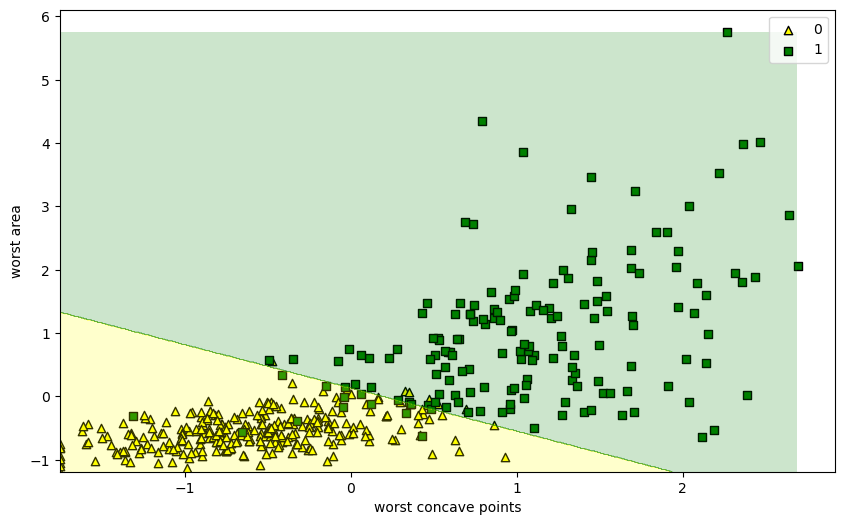

Accuracy of SVC with linear kernel on the test set is 0.956


In [5]:
### BEGIN SOLUTION ###

kernels = ['linear']
accs = []
for kernel in kernels:
    model = SVC(kernel=kernel,C=1.)
    cv_scores = cross_val_score(model,X_train_2feats,y_train,scoring='accuracy',cv=10)
    cv_acc = np.mean(cv_scores)
    accs.append(cv_acc)
    print('Kernel {}, acc: {:.4f}'.format(kernel,cv_acc))

    # Instantiate and train the SVC model
    model = SVC(kernel=kernel, C=1.)
    model.fit(X_train_2feats, y_train)

    # Display the data and the decision boundary
    plt.figure(figsize=(10,6))
    plot_decision_boundaries(X_train_2feats, y_train, model)
    plt.xlabel('worst concave points')
    plt.ylabel('worst area')
    plt.show()

opt = np.argmax(accs)
opt_kernel = kernels[opt]
    


# Calculate accuracy on the test set
acc = accuracy_score(y_test,model.predict(X_test_2feats))
print('Accuracy of SVC with {} kernel on the test set is {:.3f}'.format(opt_kernel,acc))

### END SOLUTION ###

### Custom implementation of SVM

In [2]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

m = AbstractModel()

m.FEATURES = Set()
m.NUMBER_OF_SAMPLES = Set()

m.ALPHA = Var(m.NUMBER_OF_SAMPLES, domain = NonNegativeReals)

m.y = Param(m.NUMBER_OF_SAMPLES)
m.X = Param(m.NUMBER_OF_SAMPLES, m.FEATURES)

def dot_product(m, i, j):
    return sum(m.X[i, k] * m.X[j, k] for k in m.FEATURES)

m.DOT = Expression(m.NUMBER_OF_SAMPLES, m.NUMBER_OF_SAMPLES, initialize = dot_product)

def lagrange(m):
    return quicksum(m.ALPHA[i] for i in m.NUMBER_OF_SAMPLES) - \
            0.5 * quicksum(m.ALPHA[i] * m.ALPHA[j] * m.y[i] * m.y[j] * m.DOT[i, j] for i in m.NUMBER_OF_SAMPLES for j in m.NUMBER_OF_SAMPLES)

m.obj = Objective(rule = lagrange, sense = maximize)
def constraint(m):
    return quicksum(m.ALPHA[i] * m.y[i] for i in m.NUMBER_OF_SAMPLES) == 0


    

m.constraint = Constraint(rule = constraint)



In [44]:
x_samples = np.array([[1.5, 1.5], [0, 1], [3, 3], [4, 4]])
y_samples = np.array([-1, -1, 1, 1]).reshape(-1, 1)

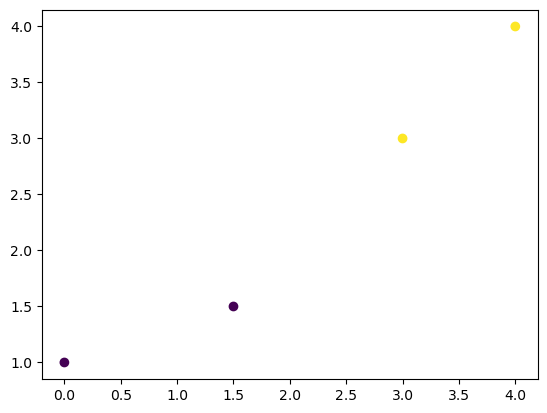

In [45]:
plt.scatter(x_samples[:, 0], x_samples[:, 1], c = y_samples.squeeze())

In [46]:
features = np.arange(x_samples.shape[1])
n_samples = np.arange(y_samples.shape[0])
x = {(i, j): value for i, row in enumerate(x_samples) for j, value in enumerate(row)}
y = dict(enumerate(y_samples))
instanceData = {None: {
    'FEATURES': {None: features},
    'NUMBER_OF_SAMPLES': {None: n_samples},
    'y': y,
    'X': x
}}

In [176]:
class SVM:
    
    def __init__(self):
        self.model = self.create_model()
        
    def create_model(self):
        import pyomo.environ as pyo
        from pyomo.opt import SolverFactory
        
        m = pyo.AbstractModel()
        m.FEATURES = pyo.Set()
        m.NUMBER_OF_SAMPLES = pyo.Set()
        m.ALPHA = pyo.Var(m.NUMBER_OF_SAMPLES, domain = pyo.NonNegativeReals)

        m.y = pyo.Param(m.NUMBER_OF_SAMPLES)
        m.X = pyo.Param(m.NUMBER_OF_SAMPLES, m.FEATURES)

        def dot_product(m, i, j):
            return sum(m.X[i, k] * m.X[j, k] for k in m.FEATURES)

        m.DOT = pyo.Expression(m.NUMBER_OF_SAMPLES, m.NUMBER_OF_SAMPLES, initialize = dot_product)

        def lagrange(m):
            return pyo.quicksum(m.ALPHA[i] for i in m.NUMBER_OF_SAMPLES) - \
                    0.5 * pyo.quicksum(m.ALPHA[i] * m.ALPHA[j] * m.y[i] * m.y[j] * m.DOT[i, j] for i in m.NUMBER_OF_SAMPLES for j in m.NUMBER_OF_SAMPLES)

        m.obj = pyo.Objective(rule = lagrange, sense = pyo.maximize)
        def constraint(m):
            return pyo.quicksum(m.ALPHA[i] * m.y[i] for i in m.NUMBER_OF_SAMPLES) == 0

        m.constraint = pyo.Constraint(rule = constraint)
        return m
    
    def fit(self, X, y):
        from pyomo.opt import SolverFactory
        import pyomo.environ as pyo
        
        instanceData = self.get_instance_data(X, y)
        instance = self.model.create_instance(instanceData)
        opt = SolverFactory('ipopt')
        opt.solve(instance)
        self.alpha = np.array([pyo.value(instance.ALPHA[i]) for i in instance.NUMBER_OF_SAMPLES]).reshape(-1, 1)
        self.X = X
        self.y = y
        
    def get_instance_data(self, X, y):
        features = np.arange(X.shape[1])
        n_samples = np.arange(y.shape[0])
        x = {(i, j): value for i, row in enumerate(X) for j, value in enumerate(row)}
        y = dict(enumerate(y))
        instanceData = {None: {
            'FEATURES': {None: features},
            'NUMBER_OF_SAMPLES': {None: n_samples},
            'y': y,
            'X': x
        }}
        return instanceData
    
    def predict(self, u):
        """
        u: (M, n_features)
        Returns: (M, 1) array of predictions in range {-1, 1}
        """
        # alpha shape = (N, )
        # X @ u.T will be of shape (N, M)
        # Need alpha to be of shape (N, 1)
        are_support_vectors = np.logical_not(np.isclose(self.alpha, 0)).squeeze()
        x_support = self.X[are_support_vectors]
        y_support = self.y[are_support_vectors]
        
        # y_support is of shape (S, 1)
        # x_support is of shape (S, n_features)
        # self.X is of shape (N, n_features)
        
        # alpha is of shape (N, 1)
        # self.y is of shape (N, 1)
        # x_support @ self.X.T is of shape (S, N)
        # summing over axis = 1 will give shape (S, 1)
        
        b = np.mean(y_support - np.sum(x_support @ (self.y * self.alpha * self.X).T, axis = 1))
        print(b)
        z = u @ (self.y * self.alpha * self.X).T 
        out = np.sum(z, axis = 1, keepdims = True) + b
        print(out)
        return np.where(out >= 0, 1, -1)
#         print(self.alpha.shape)
#         print(u.shape)
#         print(self.X.shape)


In [177]:
x_test = np.array([[1, 2], [1, 3], [2, 3]])

In [178]:
svm = SVM()
svm.fit(x_samples, y_samples)
print(svm.alpha)

[[ 4.44444466e-01]
 [-8.10567070e-09]
 [ 4.44444466e-01]
 [-8.11058132e-09]]


In [179]:
svm.predict(x_test)

-3.000000016855657
[[-1.        ]
 [-0.33333333]
 [ 0.33333334]]


array([[-1],
       [-1],
       [ 1]])

In [180]:
svm.predict(x_samples)

-3.000000016855657
[[-1.00000001]
 [-2.33333334]
 [ 1.00000001]
 [ 2.33333335]]


array([[-1],
       [-1],
       [ 1],
       [ 1]])

### 2.2
Now, let's try a polynomial kernel.  Vary the polynomial degree from 2 through 4 and create and train a SVC model with a polynomial kernel of each degree.  Leave the value of C constant at 1.  For each model, display the resulting decision boundary and calculate the cross-validation accuracy using k=10.  Visually compare the decision boundaries and their performance in classifying the data.  Then, determine which degree has the best performance in classifying the data and calculate the performance of a SVC model with that degree of polynomial kernel on the test set.

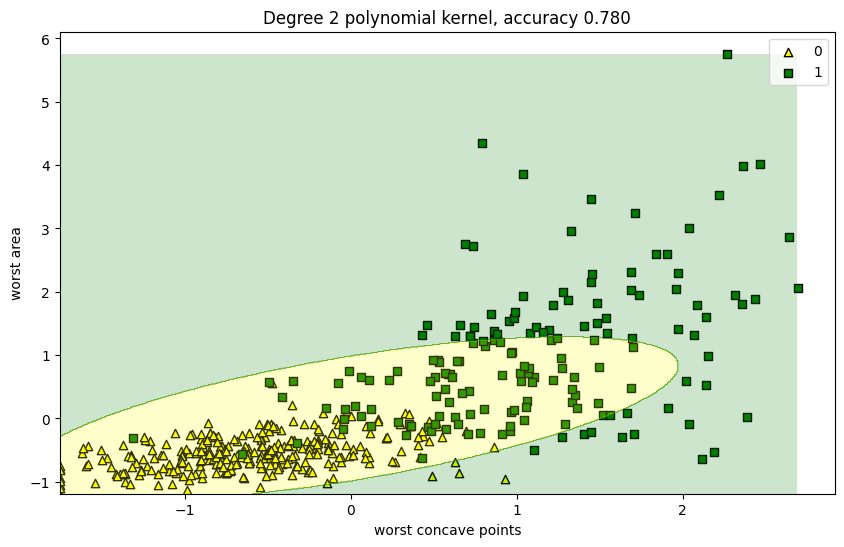

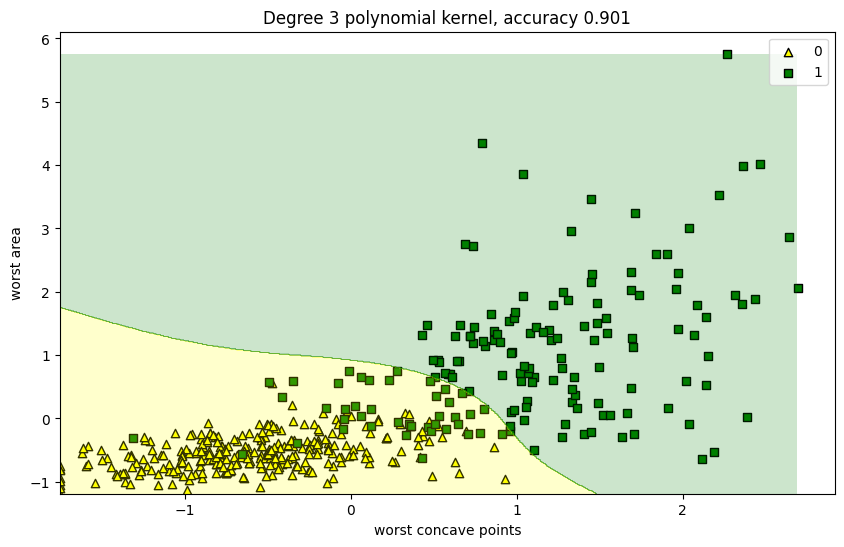

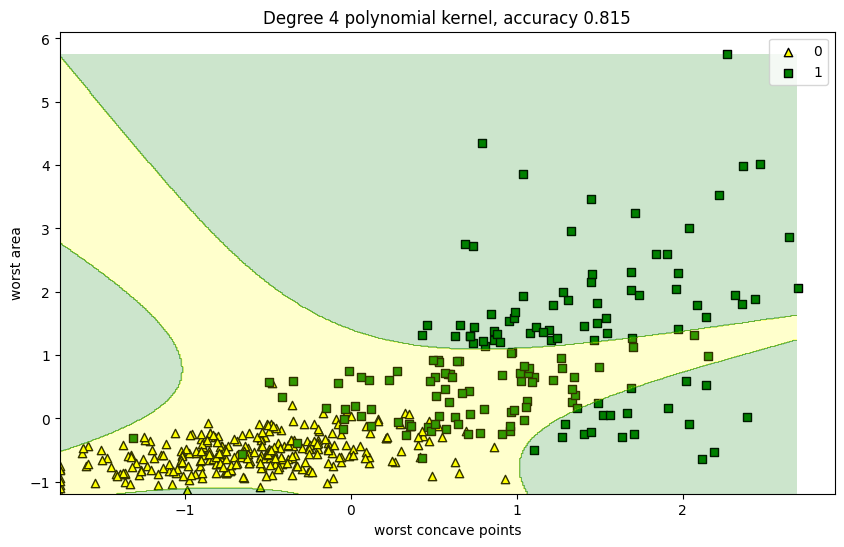

The optimal degree is 3
Accuracy of SVC with polynomial kernel of degree 3 is 0.965


In [7]:
### BEGIN SOLUTION ###
degrees = [2,3,4]
accs = []
for degree in degrees:
    
    # Instantiate the SVC model
    model = SVC(kernel='poly', degree=degree, C=1.)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model,X_train_2feats,y_train,scoring='accuracy',cv=10)
    cv_acc = np.mean(cv_scores)
    accs.append(cv_acc)
    
    # Display the data and the decision boundary
    model.fit(X_train_2feats, y_train)
    plt.figure(figsize=(10,6))
    plot_decision_boundaries(X_train_2feats, y_train, model)
    plt.title(f'Degree {degree} polynomial kernel, accuracy {cv_acc:.3f}')
    plt.xlabel('worst concave points')
    plt.ylabel('worst area')
    plt.show()

# Find the optimal degree
opt = np.argmax(accs)
opt_degree = degrees[opt]
print('The optimal degree is {}'.format(opt_degree))

# Train a model on the full training set
model = SVC(degree=opt_degree,C=1.)
model.fit(X_train_2feats,y_train)

# Calculate accuracy on the test set
acc = accuracy_score(y_test,model.predict(X_test_2feats))
print('Accuracy of SVC with polynomial kernel of degree {} is {:.3f}'.format(opt_degree,acc))

### END SOLUTION ###